# Decision Tree

In [29]:
import sklearn
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, r2_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder


In [4]:
df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data Sets\Cases\Satellite Imaging\Satellite.csv', sep=';')
df.head()

,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10,...,x.28,x.29,x.30,x.31,x.32,x.33,x.34,x.35,x.36,classes
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,grey soil
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,grey soil
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,grey soil
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,grey soil
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,grey soil


In [5]:
X = df.drop(columns=['classes'], axis=1)
y = df['classes']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24, stratify=y)

In [43]:
dtc = DecisionTreeClassifier(random_state=24)

pipe = Pipeline([
    ('classifier', dtc),
])

kfold = StratifiedKFold(n_splits=5, random_state=24, shuffle=True)

params = { 
    'classifier__criterion': ['gini', 'entropy', 'log_loss'],
    'classifier__max_depth': list([None, 2, 3, 4, 5, 6]),
    'classifier__min_samples_leaf' :  np.linspace(1, 50, 7).astype(int),
    'classifier__min_samples_split':  np.linspace(2, 50, 5).astype(int),
}


gcv = GridSearchCV(
    estimator=pipe,
    param_grid=params,
    cv=kfold,
    scoring='neg_log_loss',
    verbose=2,
)

gcv.fit(X_train, y_train)


Fitting 5 folds for each of 630 candidates, totalling 3150 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('classifier',
                                        DecisionTreeClassifier(random_state=24))]),
             param_grid={'classifier__criterion': ['gini', 'entropy',
                                                   'log_loss'],
                         'classifier__max_depth': [None, 2, 3, 4, 5, 6],
                         'classifier__min_samples_leaf': array([ 1,  9, 17, 25, 33, 41, 50]),
                         'classifier__min_samples_split': array([ 2, 14, 26, 38, 50])},
             scoring='neg_log_loss', verbose=True)

In [44]:
print(gcv.best_score_)
print(gcv.best_params_)

best_dtc = gcv.best_estimator_
y_pred = gcv.best_estimator_.predict(X_test) 

print(accuracy_score(y_test, y_pred)) 


-0.6377349983939302
{'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 33, 'classifier__min_samples_split': 2}
0.815639564992232


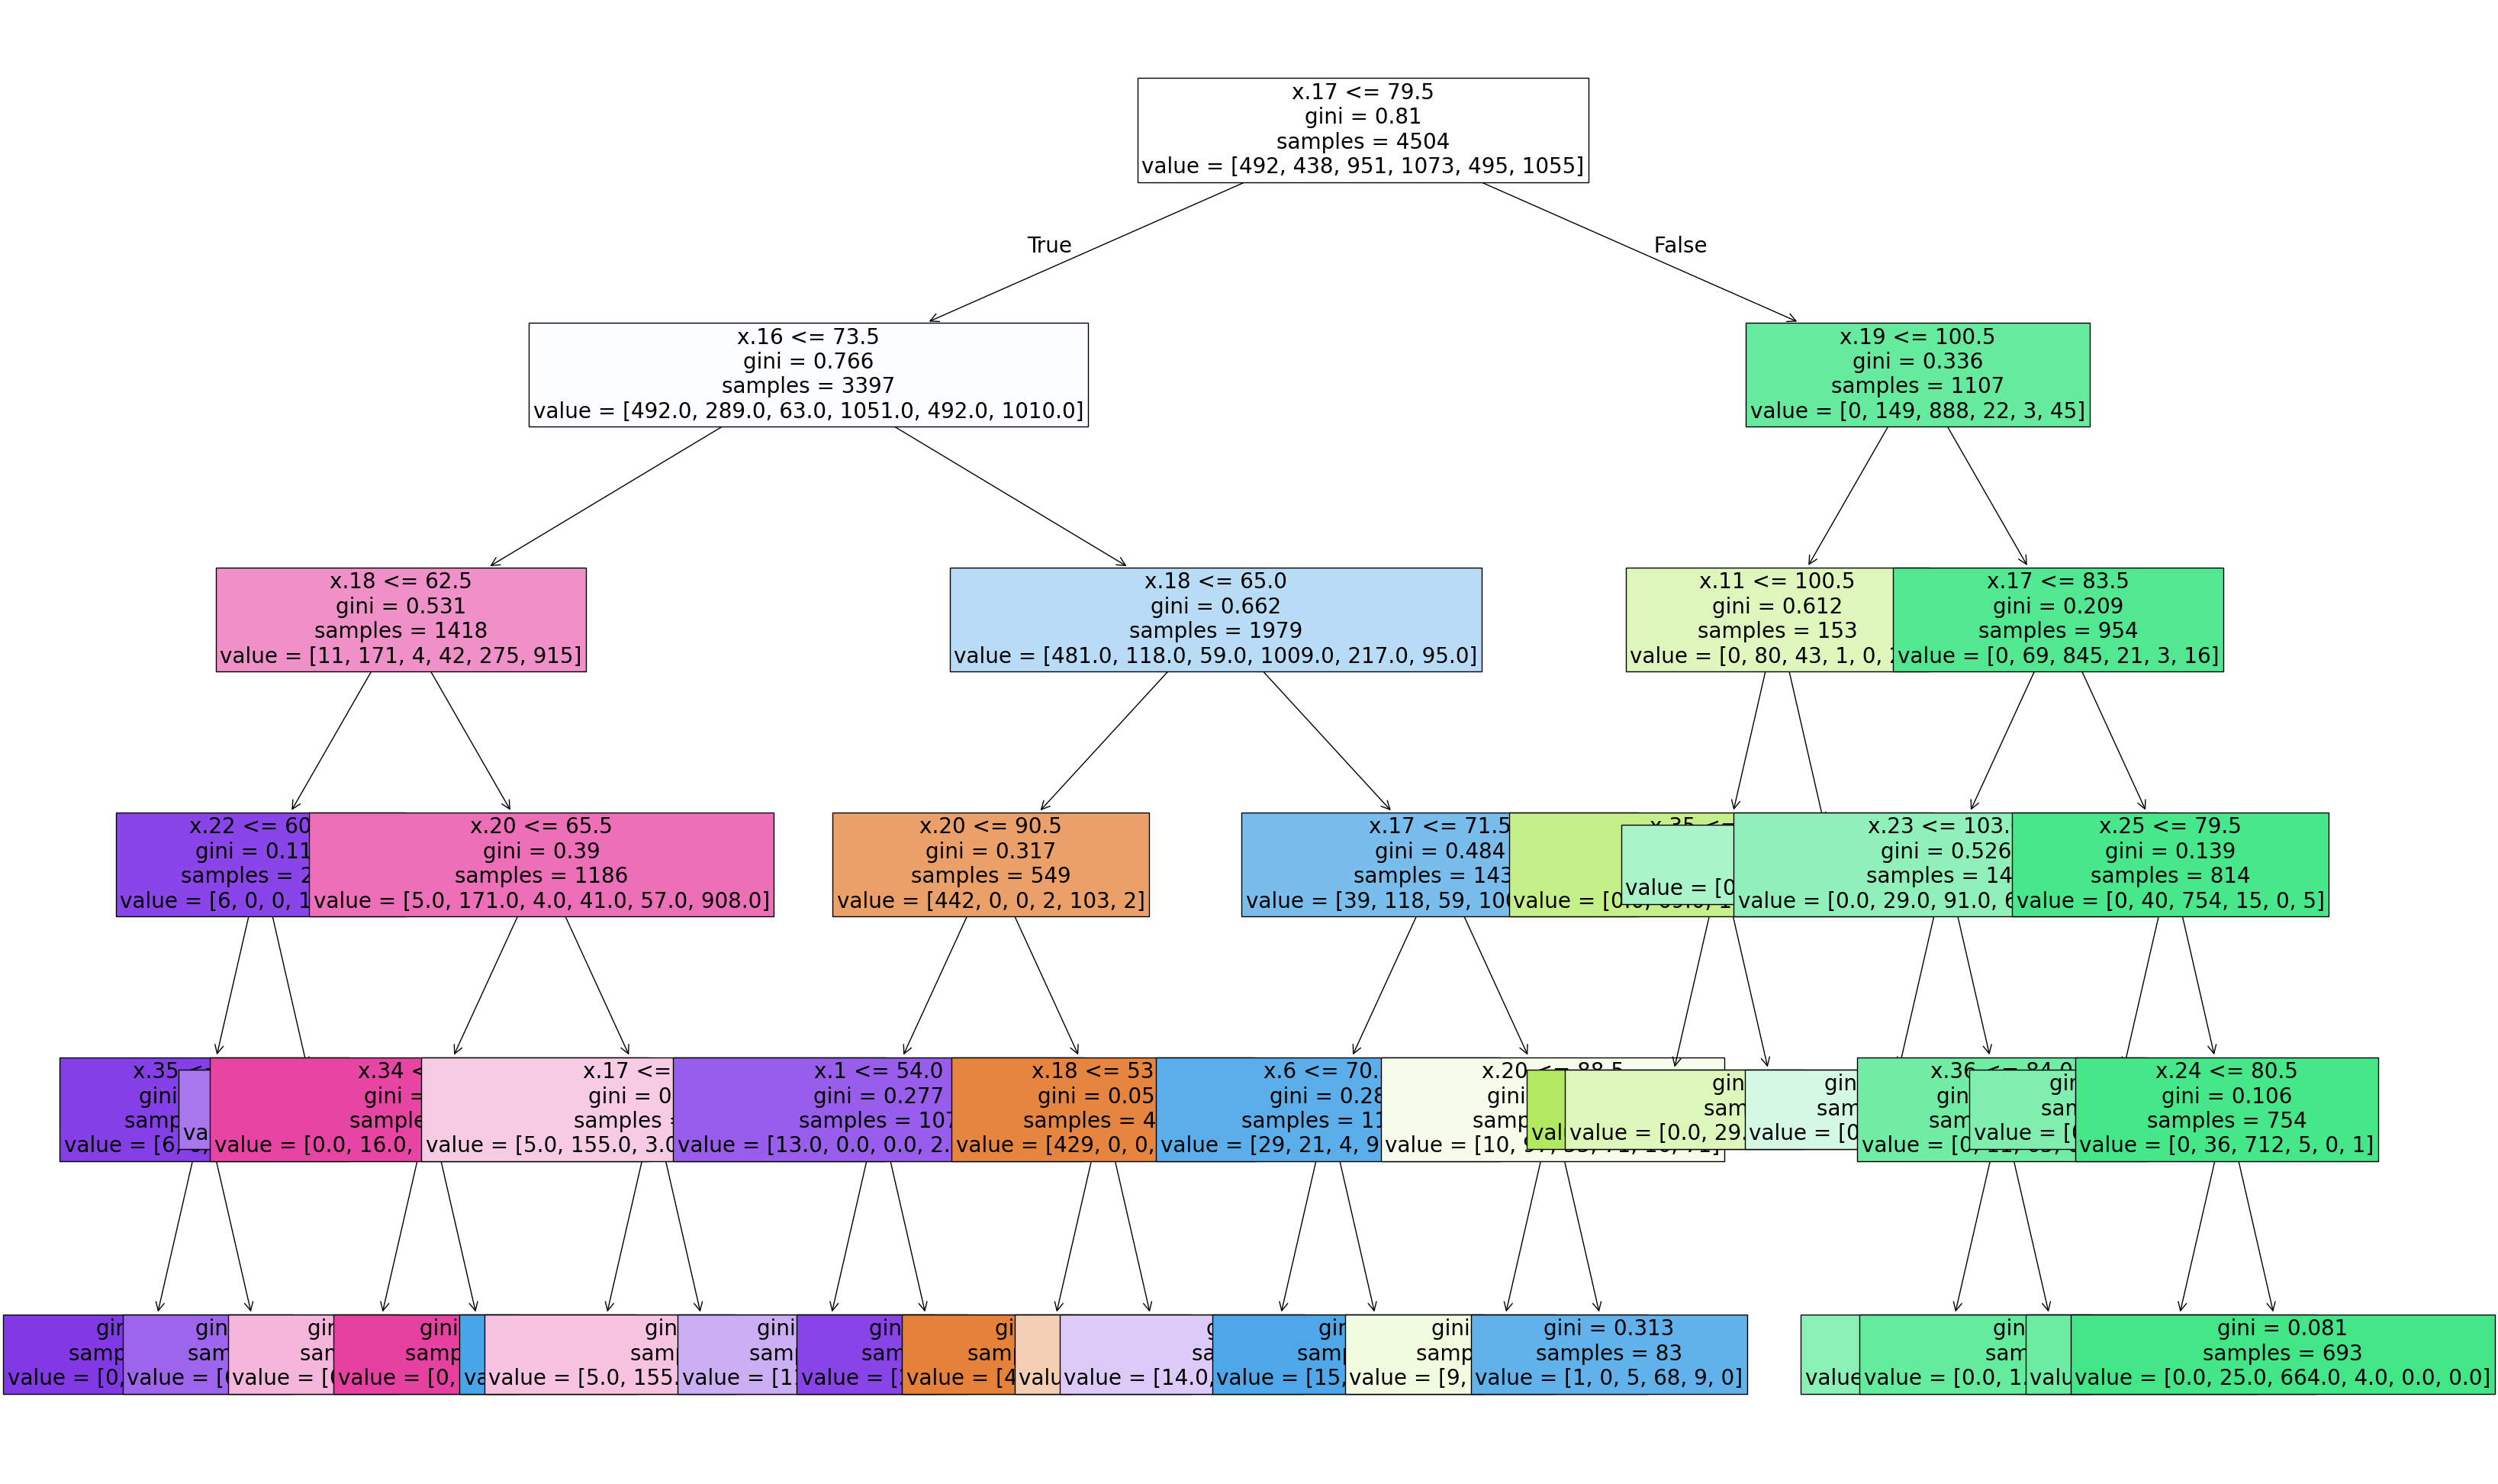

In [45]:
feature_names = X.columns

plt.figure(figsize=(38, 25))
plot_tree(gcv.best_estimator_.named_steps['classifier'], feature_names=feature_names, filled=True, fontsize=20)
plt.show()



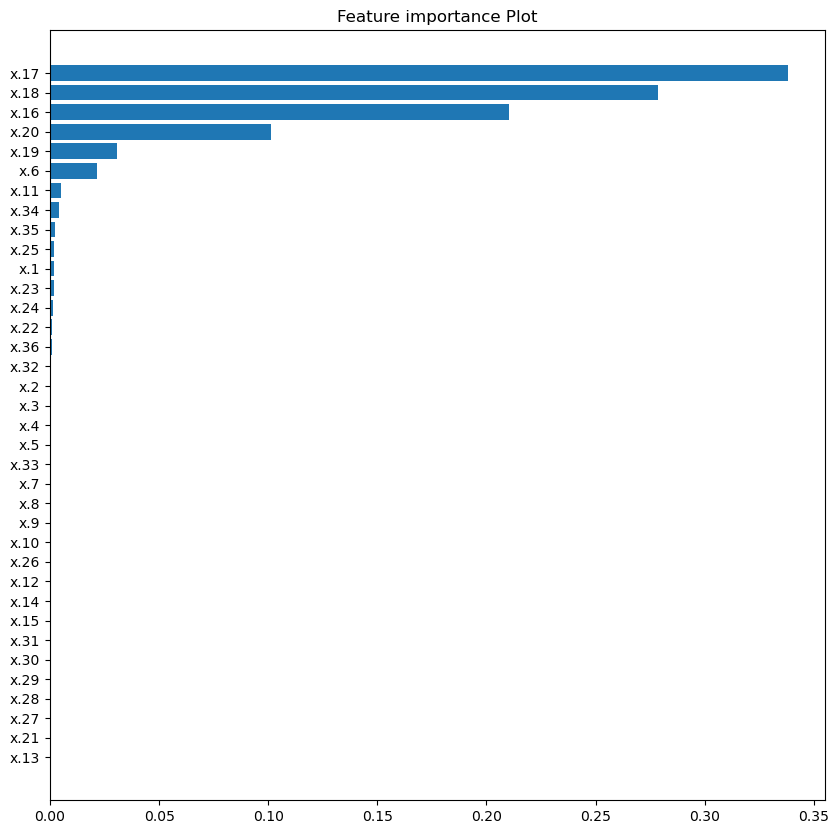

In [46]:
df_imp = pd.DataFrame({
    'features': list(X.columns),
    'importance': gcv.best_estimator_.named_steps['classifier'].feature_importances_
})

df_imp.sort_values('importance', inplace=True)

plt.figure(figsize=(10, 10))
plt.barh(df_imp['features'], df_imp['importance'])
plt.title('Feature importance Plot')
plt.show()